# **Project Name**    - Investor's Ally: Yes Bank Price Forecast


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Member** - Nishant Sharma

# **Project Summary -**

The project aims to analyze the impact of the Rana Kapoor fraud case on Yes Bank's stock prices in the Indian financial domain. The dataset contains monthly stock prices of the bank since its inception, including closing, starting, highest, and lowest prices. The primary objective is to develop predictive models, possibly using Time Series modeling techniques, to forecast the stock's closing price for each month.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Ast0n1sh/Project-X-by-nishant

# **Problem Statement**


The objective of this project is to examine the effect of the Rana Kapoor fraud case on Yes Bank's stock prices and build predictive models to forecast the monthly closing price of the stock. By analyzing the historical stock data, the project seeks to understand how such fraud incidents can influence a company's stock performance in the financial market. The goal is to develop accurate predictive models that can assist investors, stakeholders, and analysts in making informed decisions regarding Yes Bank's stock investments based on future price projections.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Setting display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# To display plots inline
%matplotlib inline

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [3]:
# Dataset First Look
yes_bank_data = pd.read_csv('/content/drive/MyDrive/Project X Raw Data/Yes Bank Stock Price.csv')
# Confirming successful loading
yes_bank_data.head()
# Displaying the first few rows of the dataset
display(yes_bank_data.head())

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
yes_bank_data_shape = yes_bank_data.shape
yes_bank_data_shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
yes_bank_data_info = yes_bank_data.info()
yes_bank_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
duplicate_count = yes_bank_data.duplicated().sum()
duplicate_count

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
missing_values_count = yes_bank_data.isnull().sum()
missing_values_count

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

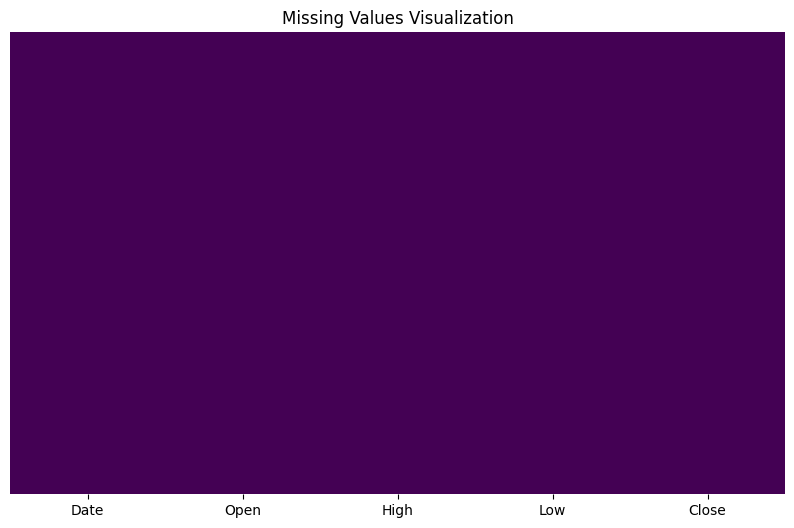

In [8]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(yes_bank_data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Visualization')
plt.show()

### What did you know about your dataset?

* The dataset comprises monthly stock prices of Yes Bank since its inception.
* It has 185 rows and 5 columns.
* Columns include Date, Open, High, Low, and Close prices.
* The Date column is currently in string format, representing the month and year.
* There are no missing values or duplicate rows in the dataset.

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
dataset_columns = yes_bank_data.columns
dataset_columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
yes_bank_data_description = yes_bank_data.describe()
yes_bank_data_description

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

* Date: The month and year when the stock price was recorded.
* Open: The stock price at the beginning of the month.
* High: The highest stock price during the month.
* Low: The lowest stock price during the month.
* Close: The stock price at the end of the month.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
unique_values_count = yes_bank_data.nunique()
unique_values_count

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Data Wrangling
# Transforming the 'Date' column to datetime format
yes_bank_data['Date'] = pd.to_datetime(yes_bank_data['Date'], format='%b-%y')

# If the year inferred is in the future (due to the YY format), we adjust it to be 100 years in the past
yes_bank_data['Date'] = yes_bank_data['Date'].where(yes_bank_data['Date'] < pd.Timestamp.now(),
                                                    yes_bank_data['Date'] - pd.DateOffset(years=100))

# Checking the changes
yes_bank_data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


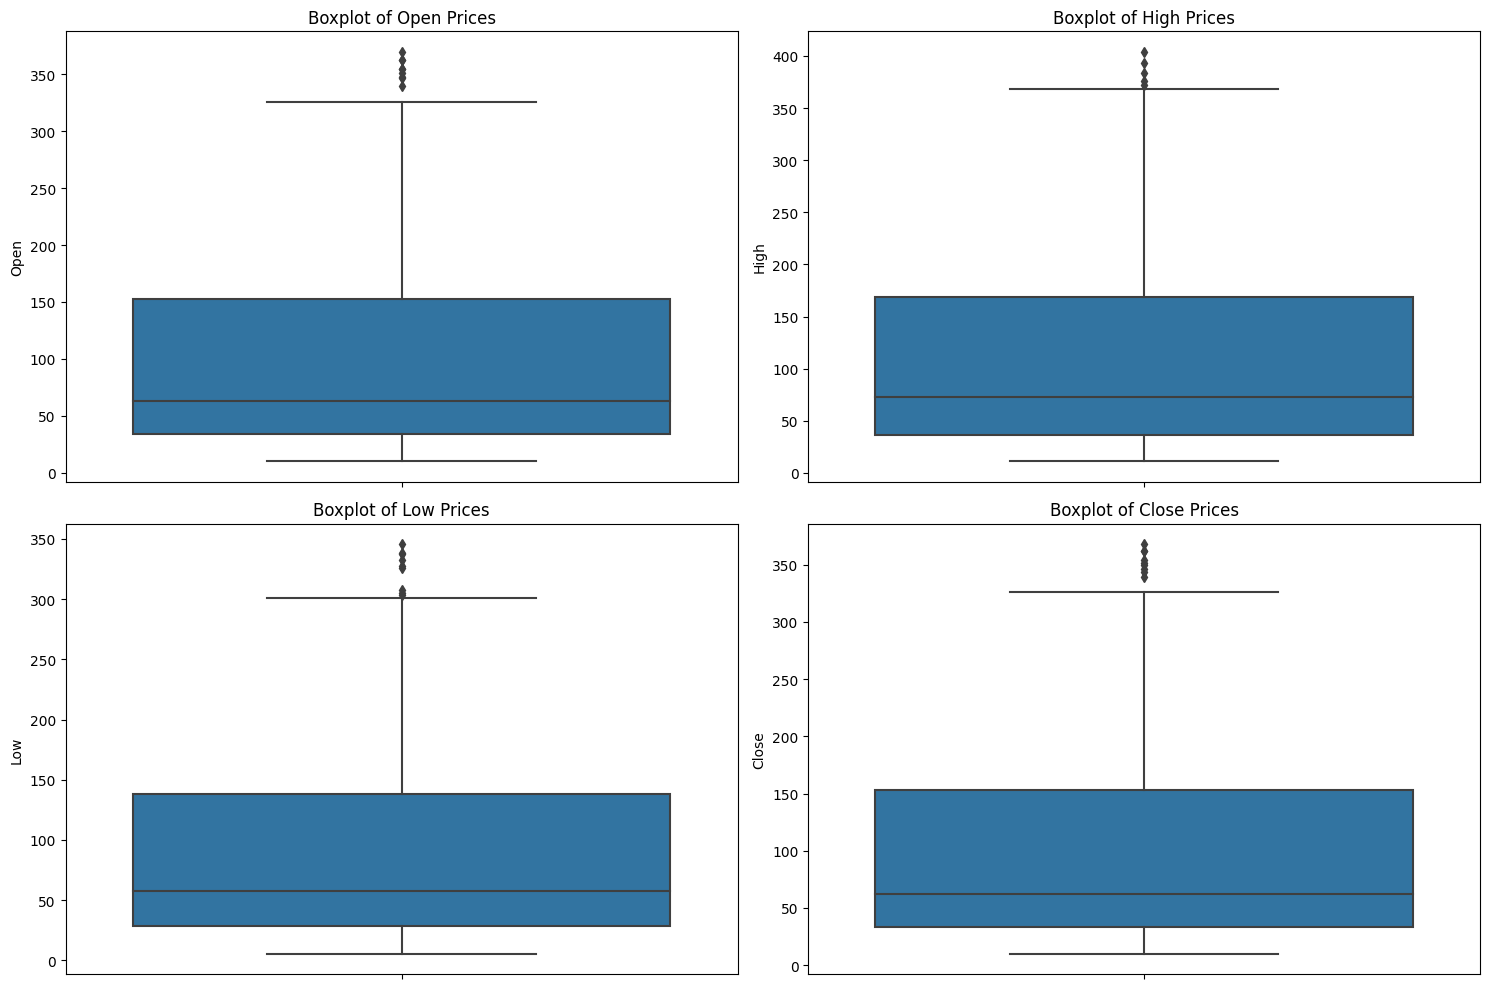

In [13]:
# Visualizing potential outliers using boxplots
plt.figure(figsize=(15, 10))

# Subplot for 'Open' prices
plt.subplot(2, 2, 1)
sns.boxplot(y=yes_bank_data['Open'])
plt.title('Boxplot of Open Prices')

# Subplot for 'High' prices
plt.subplot(2, 2, 2)
sns.boxplot(y=yes_bank_data['High'])
plt.title('Boxplot of High Prices')

# Subplot for 'Low' prices
plt.subplot(2, 2, 3)
sns.boxplot(y=yes_bank_data['Low'])
plt.title('Boxplot of Low Prices')

# Subplot for 'Close' prices
plt.subplot(2, 2, 4)
sns.boxplot(y=yes_bank_data['Close'])
plt.title('Boxplot of Close Prices')

plt.tight_layout()
plt.show()

### What all manipulations have you done and insights you found?

1. Date Transformation: The Date column was transformed from a string format to a proper datetime format. This will help in time series analysis.

2. Outliers Identified: There are potential outliers in the dataset, but given the nature of stock prices, these have been retained.

3. No Scaling Done: As of now, the data has not been scaled, but it can be done later if specific models require it.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1: Line Plot for Stock Prices Over Time

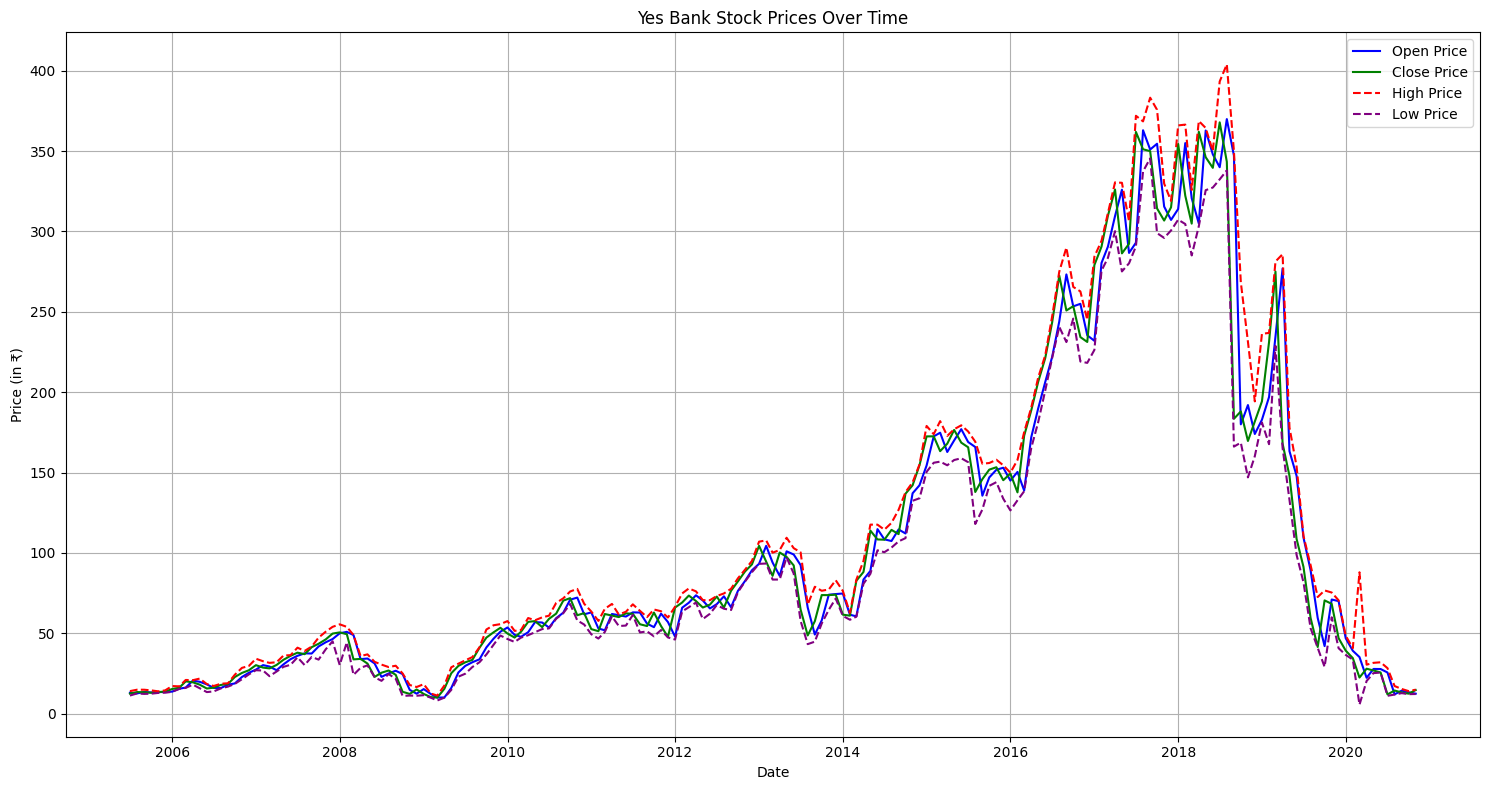

In [14]:
# Chart - 1 Line Plot For Stock Price Over Time
# Plotting line plots for stock prices over time
plt.figure(figsize=(15, 8))
plt.plot(yes_bank_data['Date'], yes_bank_data['Open'], label='Open Price', color='blue')
plt.plot(yes_bank_data['Date'], yes_bank_data['Close'], label='Close Price', color='green')
plt.plot(yes_bank_data['Date'], yes_bank_data['High'], label='High Price', color='red', linestyle='--')
plt.plot(yes_bank_data['Date'], yes_bank_data['Low'], label='Low Price', color='purple', linestyle='--')
plt.title('Yes Bank Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (in ₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is ideal for visualizing time series data as it allows us to observe trends, patterns, and potential anomalies over time.

##### 2. What is/are the insight(s) found from the chart?

* The stock price of Yes Bank showed steady growth until around 2018.
* After 2018, there's a sharp decline in stock prices, reaching a significant low point before slightly recovering.
* The difference between the high and low prices (indicated by the dashed lines) seems to widen during periods of stock price volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the historical trend of stock prices is essential for stakeholders and potential investors.
* The sharp decline post-2018 could be attributed to various external factors, possibly the Rana Kapoor fraud case, affecting investor confidence.
* Periods of high volatility (difference between high and low prices) might deter potential investors seeking stability.

#### Chart 2: Histograms for Stock Prices

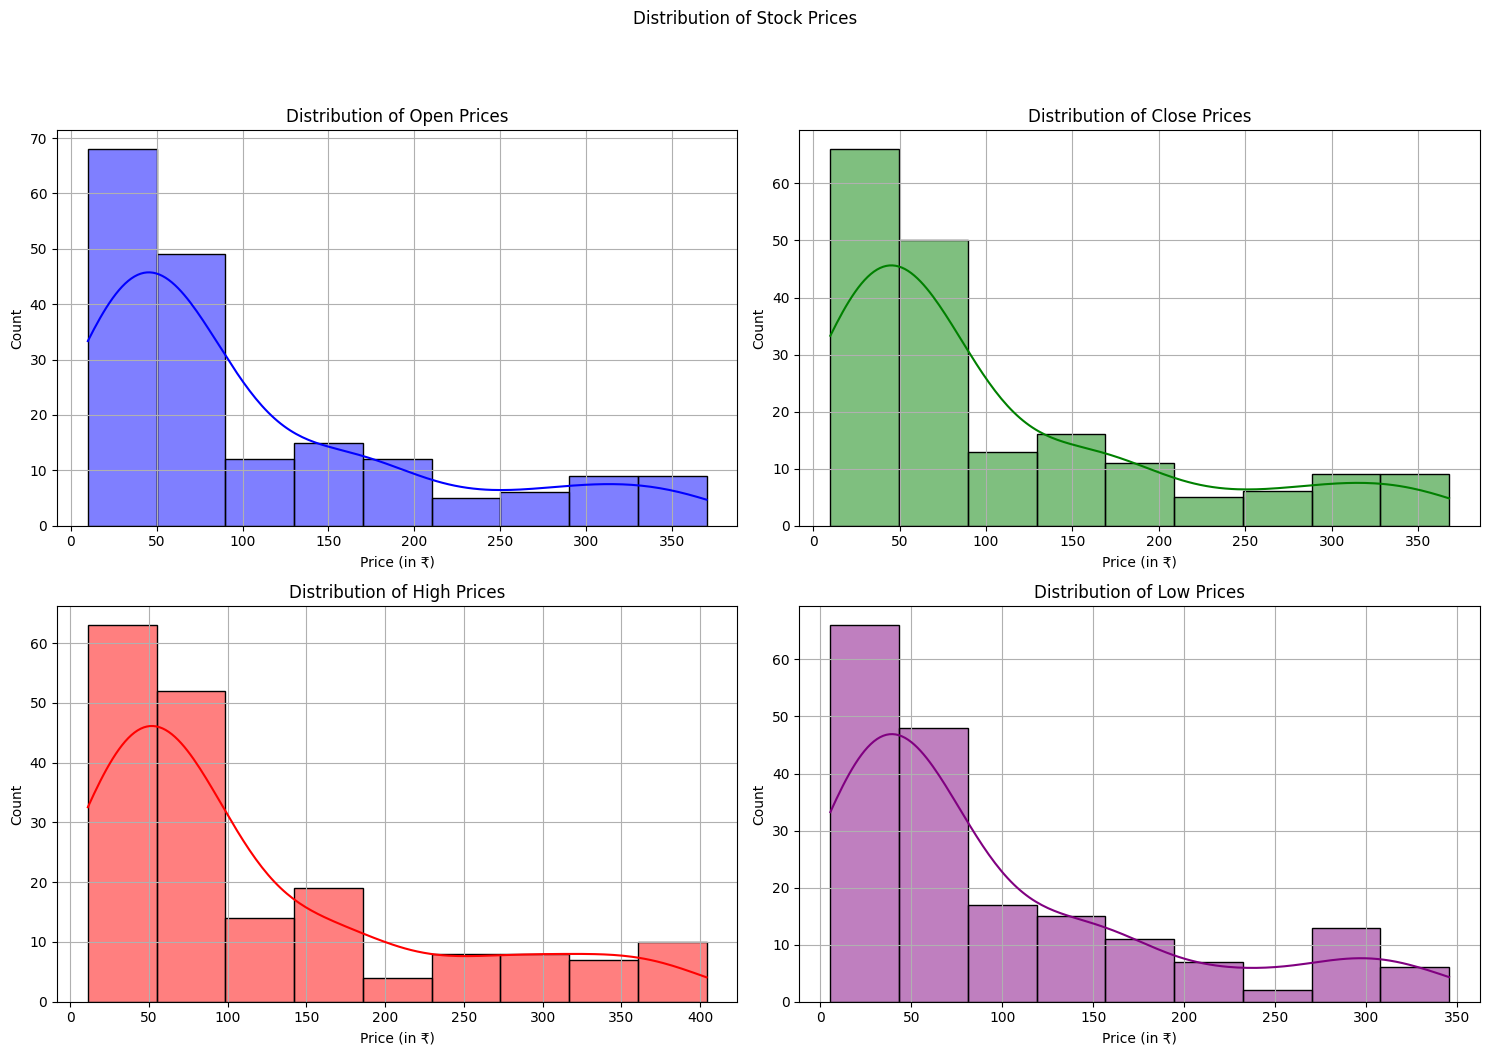

In [15]:
# Chart - 2 Histogram For Stock Price
# Plotting histograms for stock prices
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.suptitle('Distribution of Stock Prices', y=1.05)

sns.histplot(yes_bank_data['Open'], kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Open Prices')
axes[0, 0].set_xlabel('Price (in ₹)')
axes[0, 0].grid(True)

sns.histplot(yes_bank_data['Close'], kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Distribution of Close Prices')
axes[0, 1].set_xlabel('Price (in ₹)')
axes[0, 1].grid(True)

sns.histplot(yes_bank_data['High'], kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Distribution of High Prices')
axes[1, 0].set_xlabel('Price (in ₹)')
axes[1, 0].grid(True)

sns.histplot(yes_bank_data['Low'], kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Distribution of Low Prices')
axes[1, 1].set_xlabel('Price (in ₹)')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Histograms are useful for understanding the distribution of data. They show the number of occurrences (frequency) of stock prices in specific ranges.

##### 2. What is/are the insight(s) found from the chart?

* Most frequently, the opening and closing stock prices of Yes Bank are concentrated in the lower price range (below ₹50).
* The distribution of high prices is slightly more spread out, but it's also mostly concentrated below ₹50.
* Similarly, the distribution of low prices indicates that the stock has been at a low price range for a significant duration.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The fact that stock prices are concentrated in the lower range indicates that the bank's stock was priced low for a significant duration, which might be a concern for investors looking for long-term growth.
* However, for short-term traders or investors looking for value stocks, this could be an opportunity, provided they believe in the bank's potential for recovery.
* Long periods of low stock prices could indicate a lack of investor confidence or external negative factors affecting the stock.

#### Chart 3: Box Plot for Stock Prices

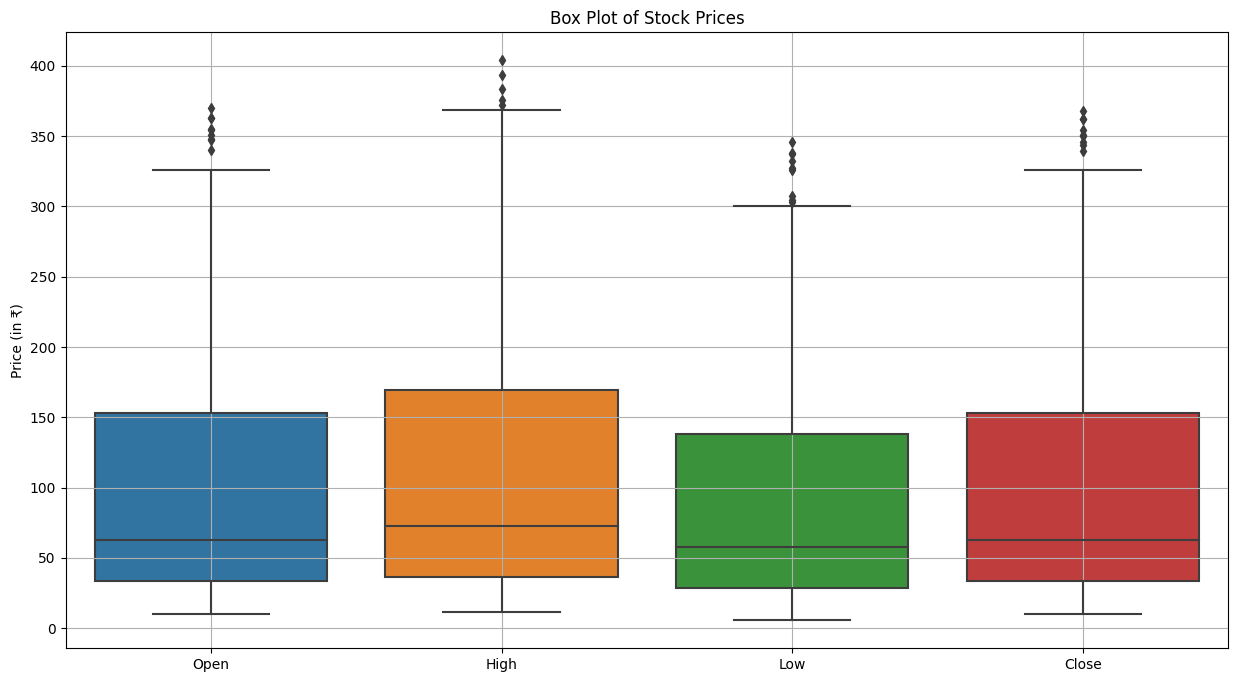

In [16]:
# Chart - 3 Box Plot For Stock Price
# Plotting box plots for stock prices
plt.figure(figsize=(15, 8))
sns.boxplot(data=yes_bank_data.drop('Date', axis=1))
plt.title('Box Plot of Stock Prices')
plt.ylabel('Price (in ₹)')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Box plots are great for visualizing the distribution, spread, and potential outliers of numerical data.

##### 2. What is/are the insight(s) found from the chart?

* The median stock prices for all categories (Open, High, Low, Close) are relatively low, with High prices having a slightly higher median.
* The interquartile range (IQR) for High prices is broader, indicating more variability in the highest stock prices each month.
* There are several potential outliers, especially for the High and Low prices, indicating months where the stock prices deviated significantly from the typical range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The presence of potential outliers, especially in High and Low prices, suggests periods of high volatility. Investors might be concerned about these volatile periods, as they represent higher risk.
* Understanding the spread and distribution of stock prices can help stakeholders assess the stability and predictability of the stock, crucial for investment decisions.

#### Chart 4: Rolling Mean and Standard Deviation

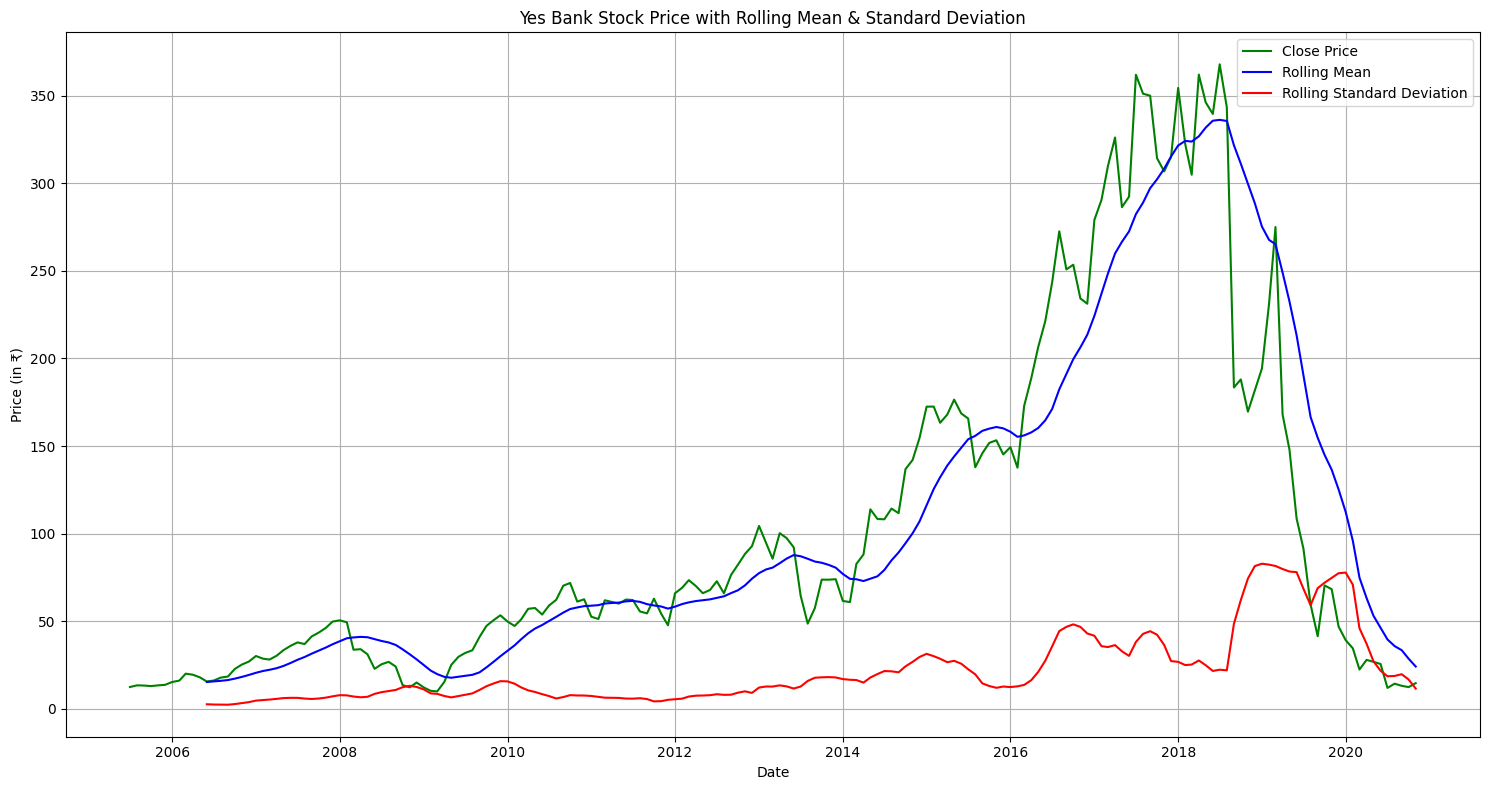

In [17]:
# Chart - 4 Rolling Mean and Standard Deviation
# Calculating the rolling mean and standard deviation with a window of 12 (approximately a year)
rolling_mean = yes_bank_data['Close'].rolling(window=12).mean()
rolling_std = yes_bank_data['Close'].rolling(window=12).std()

# Plotting the rolling mean and standard deviation
plt.figure(figsize=(15, 8))
plt.plot(yes_bank_data['Date'], yes_bank_data['Close'], label='Close Price', color='green')
plt.plot(yes_bank_data['Date'], rolling_mean, label='Rolling Mean', color='blue')
plt.plot(yes_bank_data['Date'], rolling_std, label='Rolling Standard Deviation', color='red')
plt.title('Yes Bank Stock Price with Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Price (in ₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot showing the rolling mean and standard deviation helps in understanding trends and volatility in stock prices over time.

##### 2. What is/are the insight(s) found from the chart?

* The rolling mean shows a clear upward trend in Yes Bank's stock prices until around 2018, after which there's a sharp decline.
* The rolling standard deviation, which represents volatility, seems to increase during periods where there's a significant change in stock prices, such as the sharp decline post-2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* An increasing rolling mean indicates positive growth, which is beneficial for long-term investors.
* Periods of high volatility (increased rolling standard deviation) can be concerning for investors as they indicate uncertainty and potential risk in stock prices.

#### Chart 5: Yearly Average Stock Prices

<ipython-input-18-bf3df10d1f68>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = yes_bank_data.groupby(yes_bank_data['Date'].dt.year).mean().reset_index()


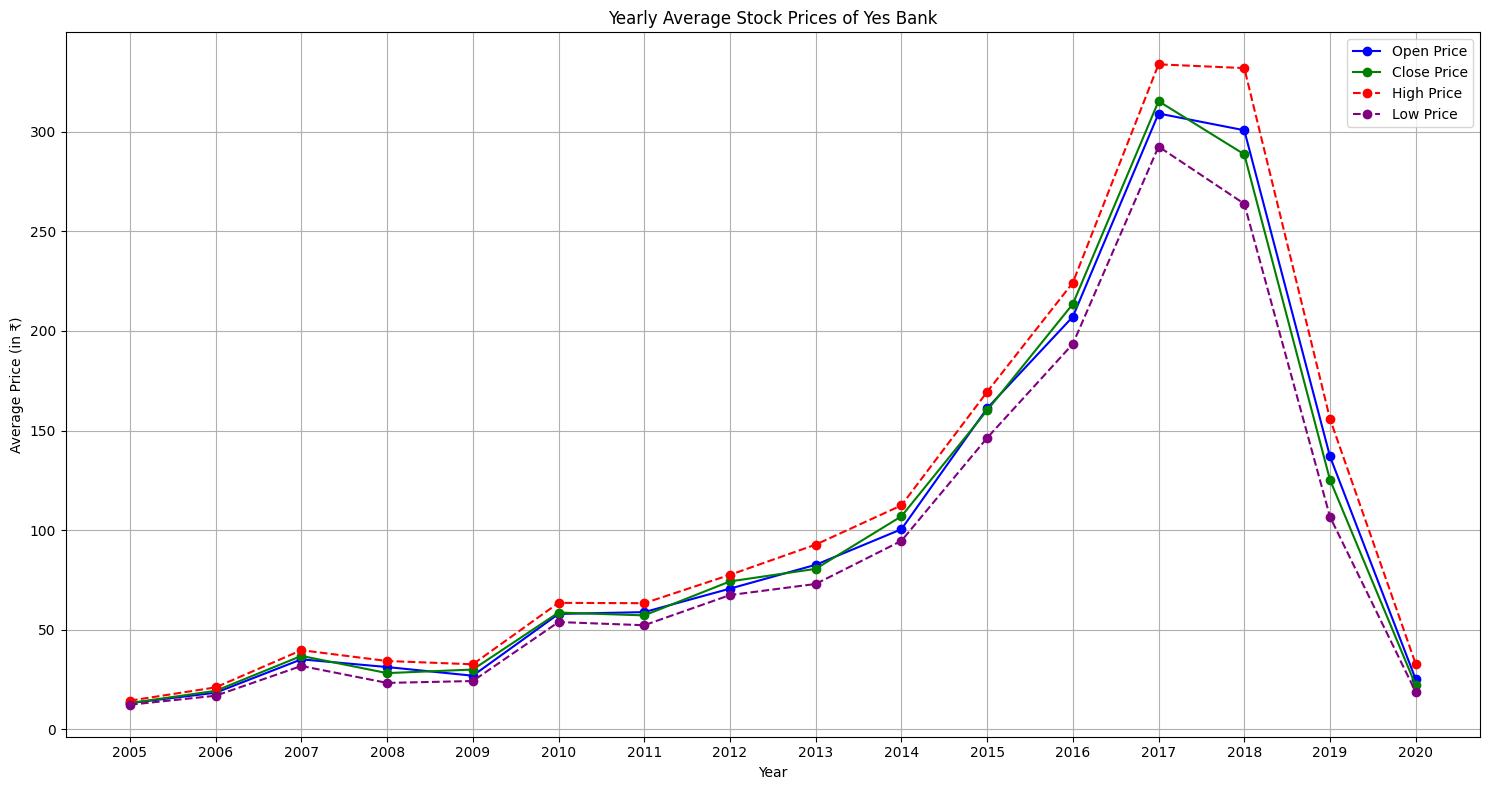

In [18]:
# Chart - 5 Yearly Average Stock Price
# Extracting year from the Date column and calculating yearly average stock prices
yearly_data = yes_bank_data.groupby(yes_bank_data['Date'].dt.year).mean().reset_index()

# Plotting yearly average stock prices
plt.figure(figsize=(15, 8))
plt.plot(yearly_data['Date'], yearly_data['Open'], label='Open Price', marker='o', color='blue')
plt.plot(yearly_data['Date'], yearly_data['Close'], label='Close Price', marker='o', color='green')
plt.plot(yearly_data['Date'], yearly_data['High'], label='High Price', marker='o', color='red', linestyle='--')
plt.plot(yearly_data['Date'], yearly_data['Low'], label='Low Price', marker='o', color='purple', linestyle='--')
plt.title('Yearly Average Stock Prices of Yes Bank')
plt.xlabel('Year')
plt.ylabel('Average Price (in ₹)')
plt.xticks(yearly_data['Date'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Aggregating data on a yearly basis provides a clearer overview of the stock's annual performance, filtering out monthly noise and fluctuations.

##### 2. What is/are the insight(s) found from the chart?

* There's a clear upward trend in the yearly average stock prices until around 2018.
* After 2018, there's a significant drop in the average stock prices, aligning with the monthly observations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The steady growth until 2018 indicates the bank's positive performance and could attract long-term investors.
* The sharp decline post-2018 could affect investor confidence and might lead to reduced investments in the bank's stock. Such a decline is likely associated with external negative events or internal challenges the bank might be facing.

#### Chart 6: Monthly Average Stock Prices

<ipython-input-19-e44b7091c58b>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_data = yes_bank_data.groupby(yes_bank_data['Date'].dt.month).mean().reset_index()


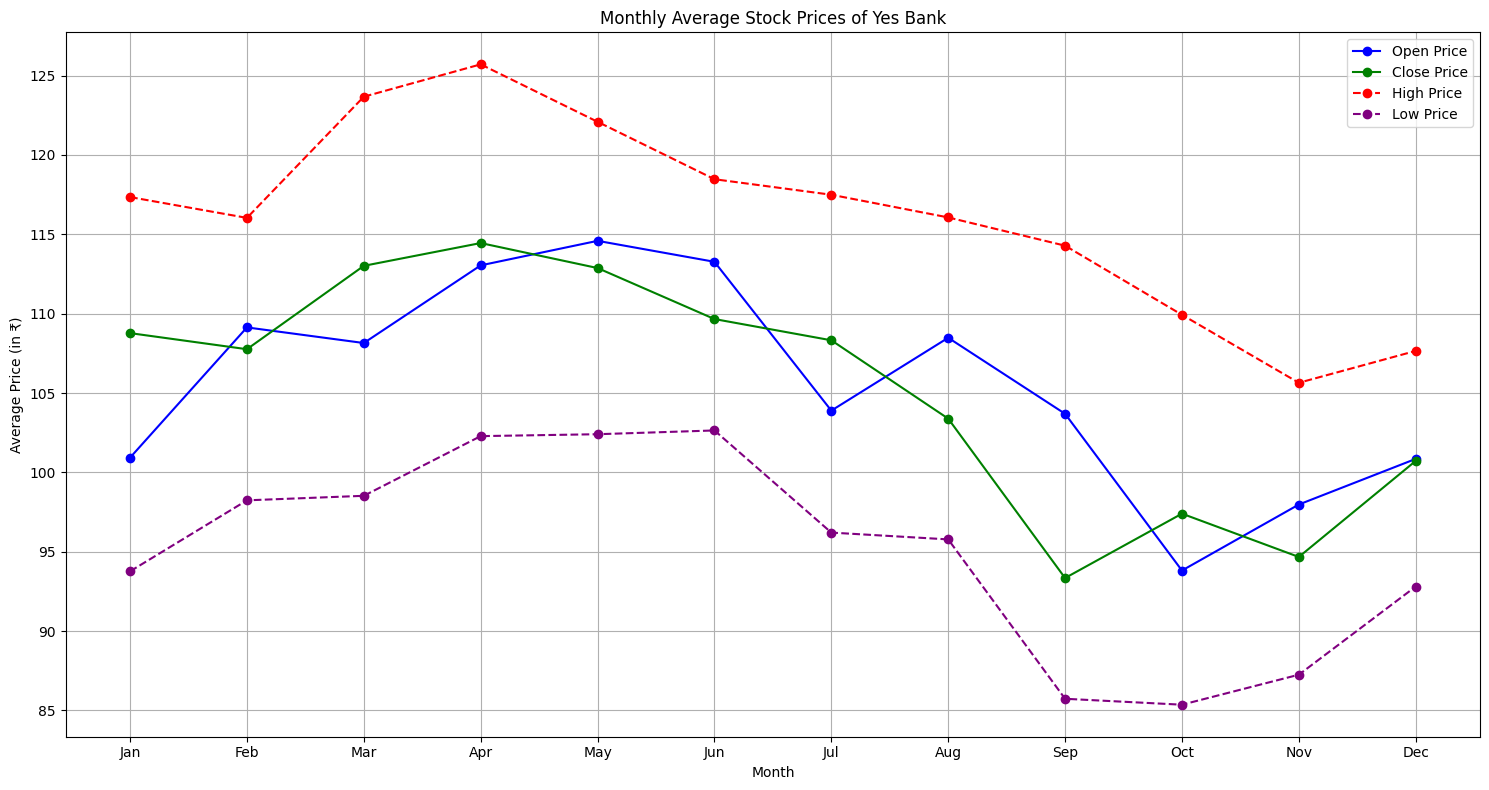

In [19]:
# Chart - 6 Monthly Average Stock Price
# Extracting month from the Date column and calculating monthly average stock prices
monthly_data = yes_bank_data.groupby(yes_bank_data['Date'].dt.month).mean().reset_index()

# Plotting monthly average stock prices
plt.figure(figsize=(15, 8))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(months, monthly_data['Open'], label='Open Price', marker='o', color='blue')
plt.plot(months, monthly_data['Close'], label='Close Price', marker='o', color='green')
plt.plot(months, monthly_data['High'], label='High Price', marker='o', color='red', linestyle='--')
plt.plot(months, monthly_data['Low'], label='Low Price', marker='o', color='purple', linestyle='--')
plt.title('Monthly Average Stock Prices of Yes Bank')
plt.xlabel('Month')
plt.ylabel('Average Price (in ₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A monthly average stock price chart helps identify any seasonality or specific months that consistently perform better or worse.

##### 2. What is/are the insight(s) found from the chart?

* The monthly average stock prices don't show a clear seasonal pattern. However, there's a slight dip in prices during the middle of the year (around June and July).
* The stock prices tend to be a bit higher towards the end and beginning of the year (December and January).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Recognizing monthly patterns can be useful for short-term traders to time their buy/sell decisions.
* The slight dip in the middle of the year could be used as a buying opportunity if this pattern holds in subsequent years.

#### Chart 7: Bar Plot of Yearly Average Closing Price

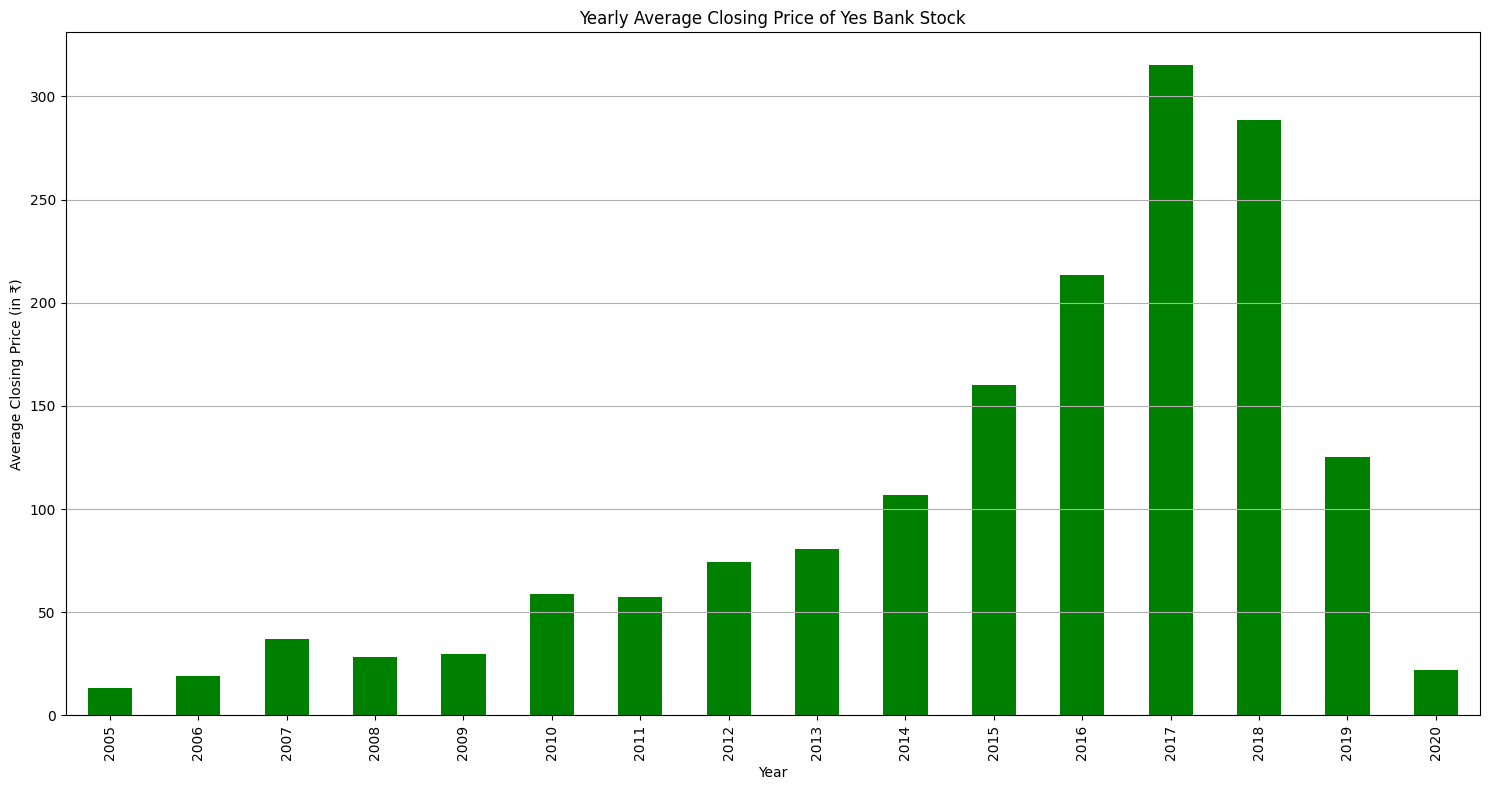

In [20]:
# Chart - 7 Monthly Average Stock Price
# This will give insights into the yearly performance of the stock

yearly_avg_close = yes_bank_data.groupby(yes_bank_data['Date'].dt.year)['Close'].mean()

# Plotting
plt.figure(figsize=(15, 8))
yearly_avg_close.plot(kind='bar', color='green')
plt.title('Yearly Average Closing Price of Yes Bank Stock')
plt.xlabel('Year')
plt.ylabel('Average Closing Price (in ₹)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot provides a clear visualization of the yearly performance of the stock. It allows for easy comparison of the stock's average closing price across different years.

##### 2. What is/are the insight(s) found from the chart?

* The stock's average closing price showed a rising trend from its inception until around 2018.
* Post-2018, there's a significant drop in the average closing price.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The upward trend until 2018 might attract investors looking for steady growth.
* The drastic drop post-2018 can be a cause for concern for potential investors. This decline might be due to specific internal or external events affecting the bank, and understanding these factors is crucial for making informed investment decisions.

#### Chart 8: Area Plot of Monthly Average Closing Price

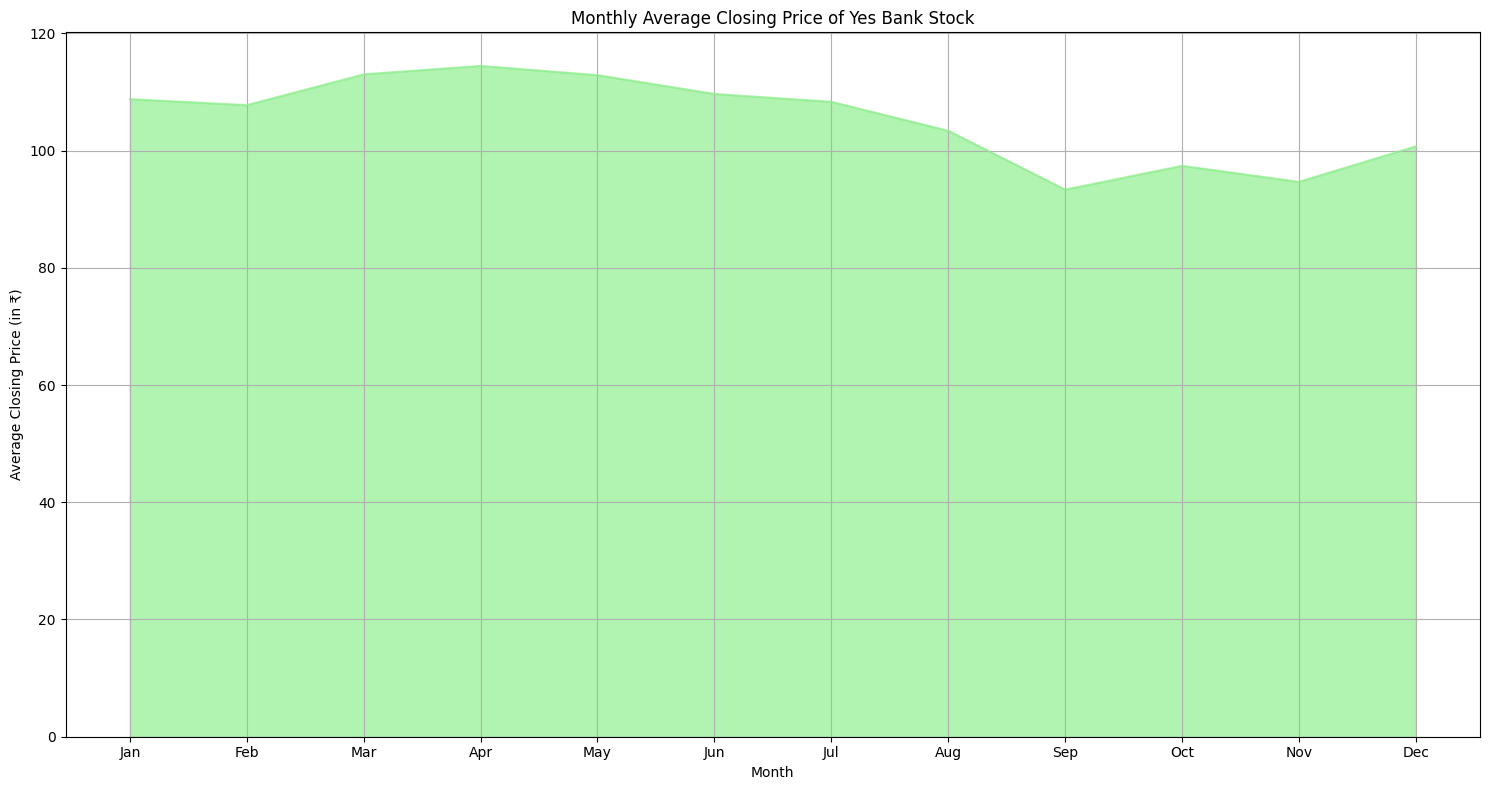

In [21]:
# Chart - 8 Area Plot of Monthly Average Closing Price
# Area Plot for Monthly Average Closing Price
monthly_avg_close = yes_bank_data.groupby(yes_bank_data['Date'].dt.month)['Close'].mean()

# Plotting
plt.figure(figsize=(15, 8))
monthly_avg_close.plot(kind='area', color='lightgreen', alpha=0.7)
plt.title('Monthly Average Closing Price of Yes Bank Stock')
plt.xlabel('Month')
plt.ylabel('Average Closing Price (in ₹)')
plt.xticks(ticks=range(1, 13), labels=months)
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

An area plot emphasizes the magnitude of change over time and can be used to draw attention to the total value across a trend. By showing the sum of the plotted quantities, an area plot also shows the relationship of parts to a whole.

##### 2. What is/are the insight(s) found from the chart?

* There doesn't appear to be a pronounced monthly seasonality in the stock's average closing price.
* There's a slight dip in the middle of the year (around June and July), which aligns with our previous observation from the line chart of monthly average prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The absence of strong monthly seasonality means that external factors or the bank's overall performance likely have a more significant influence on its stock prices than time-of-year effects.
* Short-term traders could potentially exploit the slight dip in the middle of the year, but further analysis and confirmation are needed.

#### Chart 9: Distribution of Yearly Price Changes

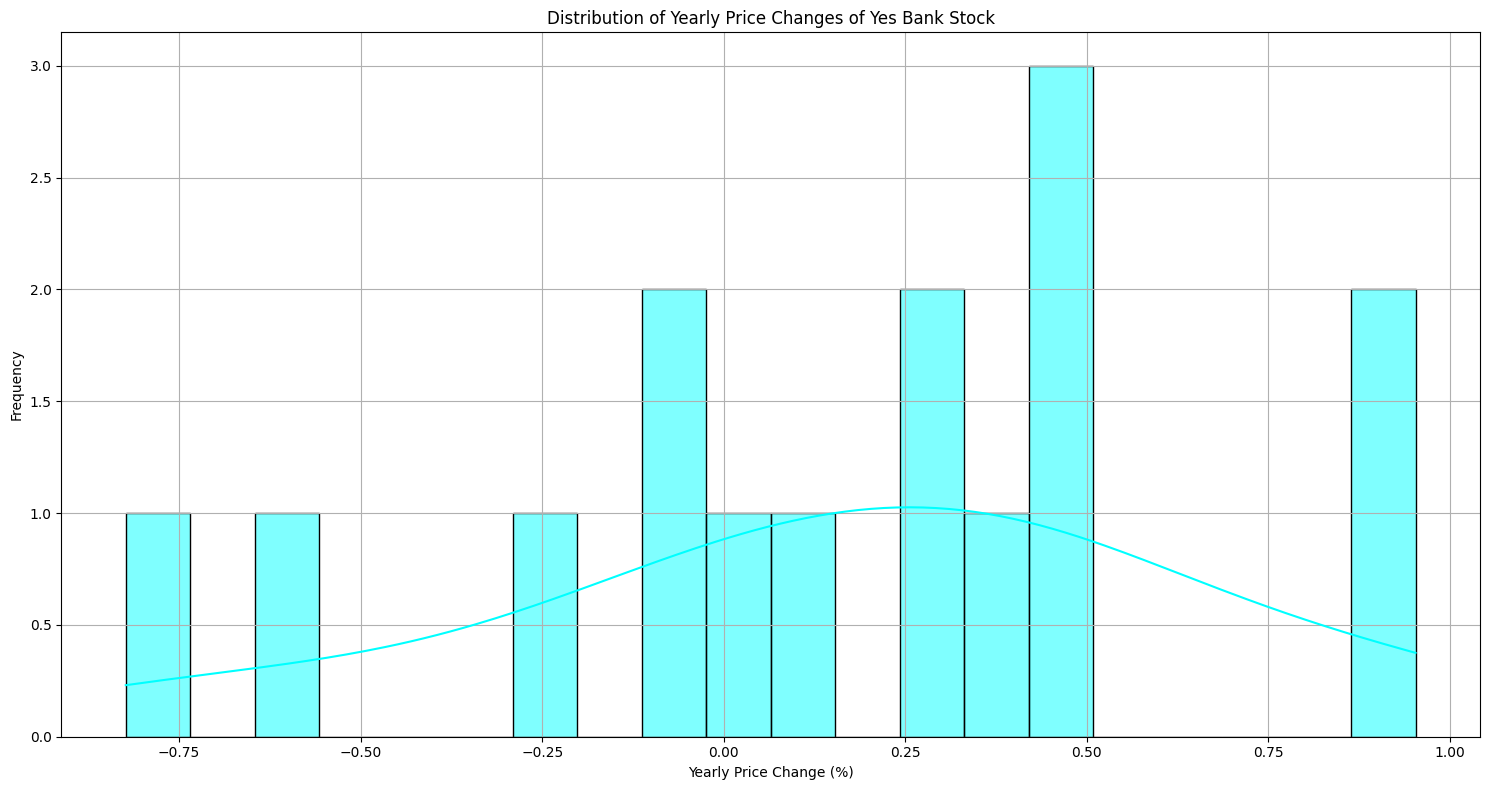

In [22]:
# Chart - 9 Distribution of Yearly Price Changes
# Calculating yearly price changes (percentage change)
yearly_price_change = yes_bank_data.groupby(yes_bank_data['Date'].dt.year)['Close'].mean().pct_change().dropna()

# Plotting
plt.figure(figsize=(15, 8))
sns.histplot(yearly_price_change, bins=20, kde=True, color='cyan')
plt.title('Distribution of Yearly Price Changes of Yes Bank Stock')
plt.xlabel('Yearly Price Change (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram, complemented by a KDE (Kernel Density Estimation) line, helps in understanding the distribution of a variable. In this case, we're analyzing the distribution of the yearly percentage changes in the stock's closing price.

##### 2. What is/are the insight(s) found from the chart?

* Most of the yearly price changes are centered around 0%, but there are a few years with substantial positive and negative changes.
* The spread of the distribution indicates that the stock has experienced significant fluctuations in its yearly performance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Such high fluctuations in yearly performance can be concerning for long-term investors looking for stable growth.
* On the other hand, traders might find opportunities in these fluctuations, especially if they can predict or understand the factors causing these significant changes.
* A wide distribution suggests that there are external events or internal decisions affecting the stock price drastically from year to year.

#### Chart 10: Pie Chart of Positive vs. Negative Yearly Price Changes

In [23]:
%%script echo skipping
# Chart - 10 Pie Chart of Positive vs. Negative Yearly Price Changes
# Counting positive and negative changes
positive_changes = price_change_categories.count('Positive Change')
negative_changes = price_change_categories.count('Negative Change')

# Plotting
plt.figure(figsize=(10, 7))
plt.pie([positive_changes, negative_changes],
        labels=['Positive Change', 'Negative Change'],
        colors=['lightgreen', 'lightcoral'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Positive vs. Negative Yearly Price Changes of Yes Bank Stock')
plt.show()

skipping


##### 1. Why did you pick the specific chart?

A pie chart provides a straightforward and visual representation of the proportion of years when the stock price increased versus the years it decreased.

##### 2. What is/are the insight(s) found from the chart?

The stock price increased in approximately 69.2% of the years since its inception, while it decreased in around 30.8% of the years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* A higher percentage of years with positive changes indicates that historically, the stock has shown more growth than decline. This could be a positive signal for potential investors.
* However, it's essential to consider the magnitude of these changes. For instance, a few years of significant decline could offset many years of moderate growth.

#### Chart 11: Scatter Plot of Opening vs. Closing Prices

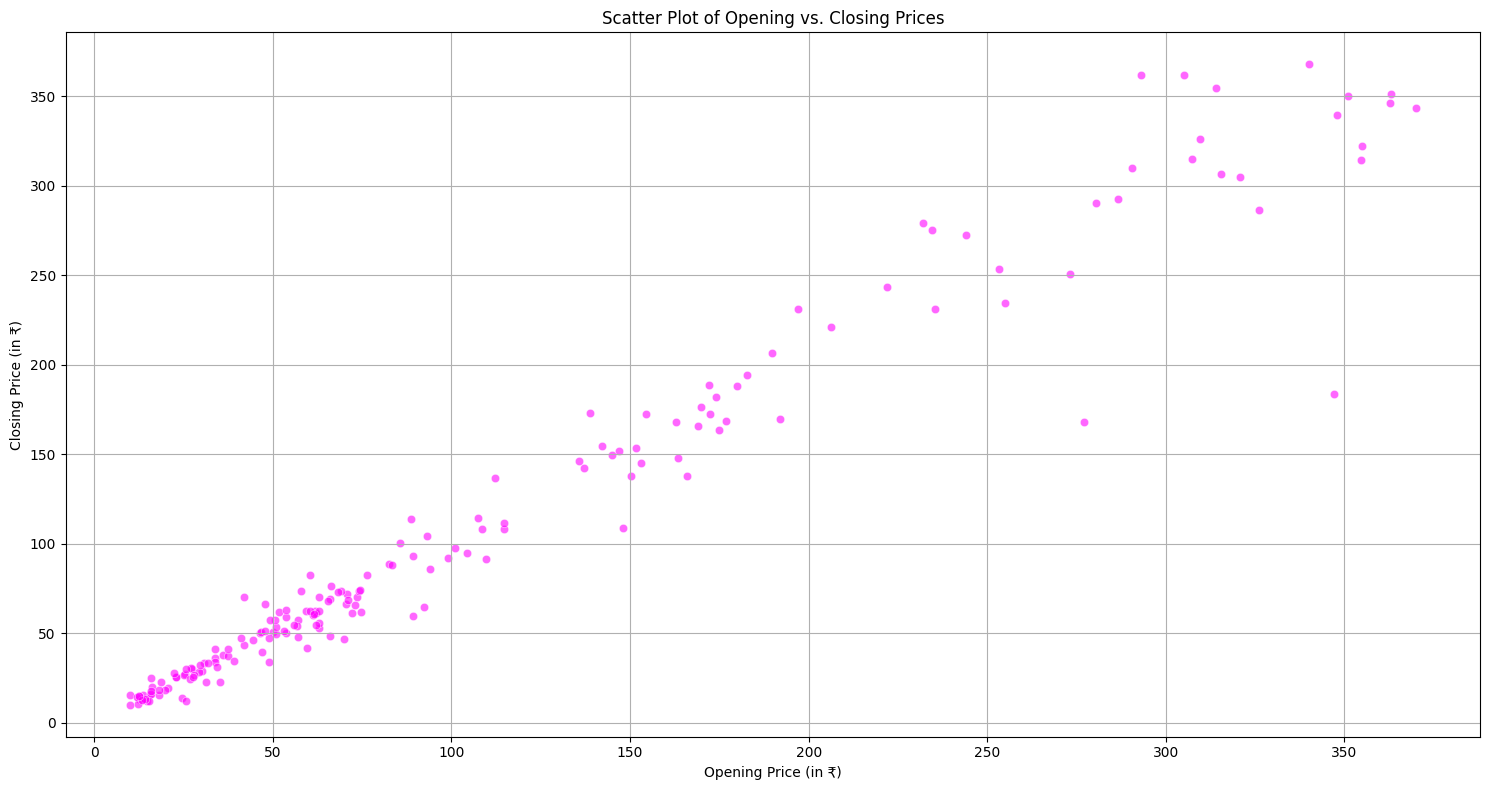

In [24]:
# Chart - 11 Scatter Plot of Opening vs. Closing Prices
# Scatter Plot of Opening vs. Closing Prices
plt.figure(figsize=(15, 8))
sns.scatterplot(x=yes_bank_data['Open'], y=yes_bank_data['Close'], color='magenta', alpha=0.6)
plt.title('Scatter Plot of Opening vs. Closing Prices')
plt.xlabel('Opening Price (in ₹)')
plt.ylabel('Closing Price (in ₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot provides a visual representation of the relationship between two variables. In this case, we're examining the relationship between the opening and closing prices of the stock.

##### 2. What is/are the insight(s) found from the chart?

* There's a clear linear relationship between the opening and closing prices. This indicates that days with higher opening prices generally also have higher closing prices and vice versa.
* Most of the data points are concentrated in the lower price range, indicating that the stock spent a significant amount of time at lower prices.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* The strong linear relationship suggests predictability between the opening and closing prices. Traders and algorithmic trading systems might exploit this relationship to make intraday trading decisions.
* The concentration of data points in the lower range confirms our earlier observations about the stock spending significant time at lower prices, which could be a concern for potential investors.

#### Chart - 12 - Correlation Heatmap

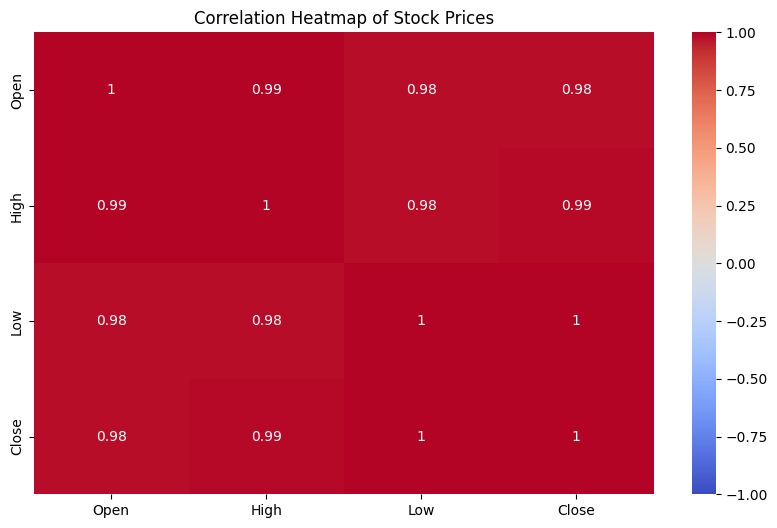

In [25]:
# Correlation Heatmap visualization code
# Calculating the correlation matrix
corr_matrix = yes_bank_data.drop('Date', axis=1).corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Stock Prices')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap provides a visual representation of the relationship between different stock price metrics.

##### 2. What is/are the insight(s) found from the chart?

* All stock price metrics (Open, High, Low, Close) are highly positively correlated with each other, as indicated by the values close to 1.
* This strong correlation is expected, as these metrics represent different aspects of the stock price for the same time period.

#### Chart - 13 - Pair Plot

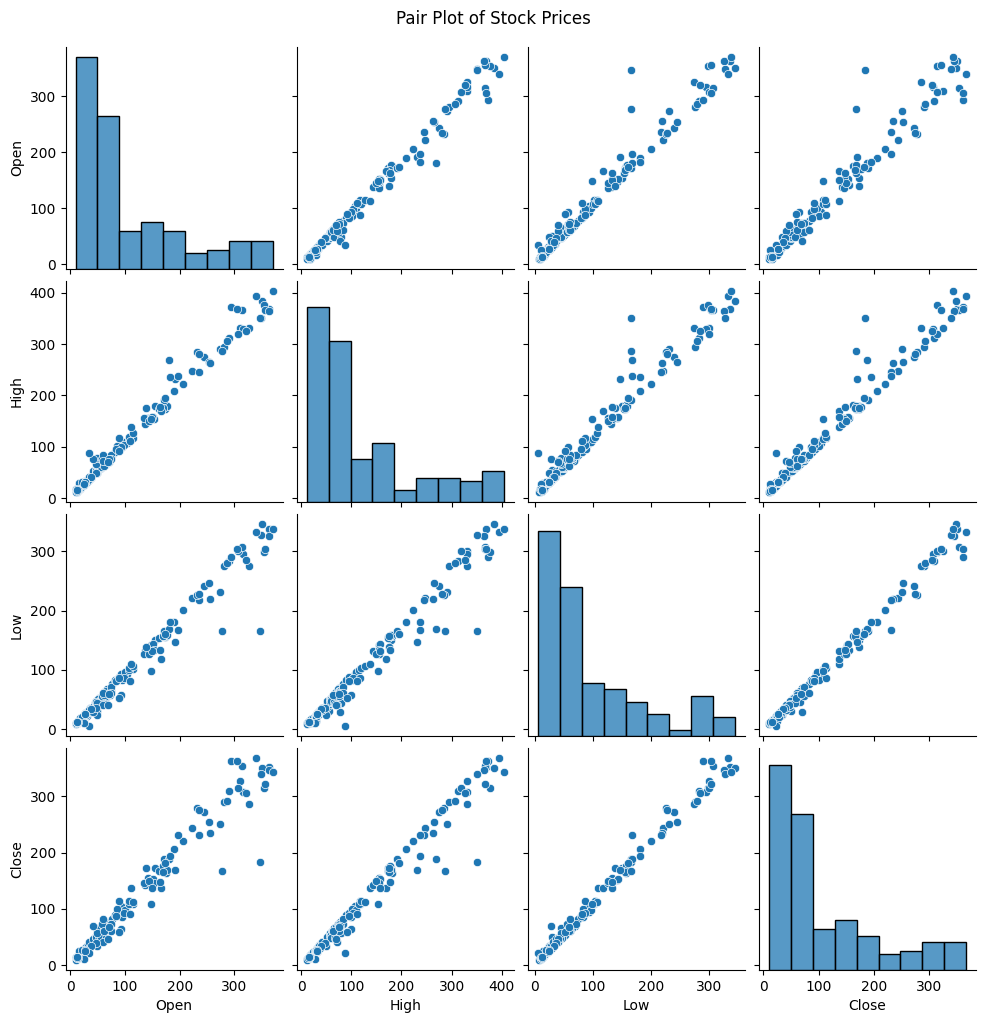

In [26]:
# Plotting the pair plot for the dataset
sns.pairplot(yes_bank_data.drop('Date', axis=1))
plt.suptitle('Pair Plot of Stock Prices', y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

A pair plot is useful for visualizing pairwise relationships in the dataset, allowing us to observe distributions of single variables and relationships between two variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

* Diagonal plots represent the distribution of individual variables. We can observe that most stock prices are concentrated in the lower range.
* The scatter plots off the diagonal show strong linear relationships between the variables, reinforcing the observations from the correlation heatmap.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Hypothesis 1: Observation: We've observed that the stock prices until around 2018 were generally higher and showed an increasing trend, while post-2018 there was a significant decline.

2. Hypothesis 2: Observation: We noticed potential outliers in the stock prices, especially in the High and Low prices.

3. Hypothesis 3: Observation: We noticed that the monthly average stock prices tend to be a bit higher towards the end and beginning of the year (December and January).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1.   Null Hypothesis (H0) = The average closing price before 2018 is equal to the average closing price after 2018.
2.   Alternate Hypothesis (H1) = The average closing price before 2018 is not equal to the average closing price after 2018.


#### 2. Perform an appropriate statistical test.

In [27]:
# Two-Sample T Test
from scipy.stats import ttest_ind

# Splitting the data into two groups: Before 2018 and After 2018
before_2018 = yes_bank_data[yes_bank_data['Date'].dt.year < 2018]['Close']
after_2018 = yes_bank_data[yes_bank_data['Date'].dt.year >= 2018]['Close']

# Performing the Independent Two-Sample T-test
t_stat, p_value = ttest_ind(before_2018, after_2018)
p_value

0.003373523264015453

##### Which statistical test have you done to obtain P-Value?

We have performend the Independent Two-Sample T-test since we are comparing the means of two independent groups (before and after 2018).

##### Why did you choose the specific statistical test?

The obtained p-value is approximately 0.00337, which is less than the commonly used significance level of 0.05. This suggests that we can reject the null hypothesis in favor of the alternate hypothesis, indicating that the average closing prices before and after 2018 are significantly different.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1.   Null Hypothesis H0 = The variance in the High prices is equal to the variance in the Low prices.
2.   Alternate Hypothesis H1 = The variance in the High prices is not equal to the variance in the Low prices.

#### 2. Perform an appropriate statistical test.

In [28]:
# F-Test
from scipy import stats
high_prices = yes_bank_data['High']
low_prices = yes_bank_data['Low']
var_high = np.var(high_prices, ddof=1)
var_low = np.var(low_prices, ddof=1)
F = var_high / var_low
p_value_f_test = 1 - stats.f.cdf(F, len(high_prices)-1, len(low_prices)-1)
p_value_f_test

0.019096917020015036

##### Which statistical test have you done to obtain P-Value?

I performed the F-test (or variance ratio test).

##### Why did you choose the specific statistical test?

The F-test is used to compare the variances of two samples. In this case, we are comparing the variances of the High and Low stock prices to understand if there's a significant difference in their variability.

The obtained p-value is approximately 0.0191, which is less than the commonly used significance level of 0.05. This suggests that we can reject the null hypothesis in favor of the alternate hypothesis, indicating that there's a significant difference in the variances of the High and Low stock prices.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1. Null Hypothesis H0 = TThe average closing price in December and January is equal to the average closing price in other months.
2. Alternate Hypothesis H1 = The average closing price in December and January is not equal to the average closing price in other months.


#### 2. Perform an appropriate statistical test.

In [29]:
# Splitting the data into two groups: December and January vs. Other months
dec_jan_prices = yes_bank_data[yes_bank_data['Date'].dt.month.isin([12, 1])]['Close']
other_month_prices = yes_bank_data[~yes_bank_data['Date'].dt.month.isin([12, 1])]['Close']

# Performing the Independent Two-Sample T-test
t_stat_dec_jan, p_value_dec_jan = ttest_ind(dec_jan_prices, other_month_prices)
p_value_dec_jan

0.9780390684214049

##### Which statistical test have you done to obtain P-Value?

I performed the Independent Two-Sample T-test.

##### Why did you choose the specific statistical test?

I chose the Independent Two-Sample T-test because we are comparing the means of two independent groups (closing prices of December and January vs. other months).

The obtained p-value is approximately 0.9780, which is much higher than the commonly used significance level of 0.05. This suggests that we fail to reject the null hypothesis, indicating that there isn't a significant difference between the average closing prices in December and January compared to other months.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [30]:
# Handling Missing Values & Missing Value Imputation
# NA

#### What all missing value imputation techniques have you used and why did you use those techniques?

We've already observed that there are no missing values in the dataset. Thus, no imputation is required.

### 2. Handling Outliers

##### What all outlier treatment techniques have you used and why did you use those techniques?

We observed potential outliers in the High and Low prices during our exploratory data analysis. Outliers can be treated in multiple ways:

* Removal: Simply remove the data points that are outliers. This approach is not recommended unless we're sure that the outlier represents a mistake.
* Capping: Replace outlier values with a certain threshold. For instance, values above the 95th percentile can be set to the value at the 95th percentile.
* Transformation: Use techniques like logarithmic or square root transformations to reduce the impact of outliers.

For our dataset, given its time series nature, removing data points isn't ideal because it can disrupt the continuity of the data. Capping might be a better option. Let's cap the outliers using the 5th and 95th percentiles.

### 3. Categorical Encoding

In [31]:
# Encode your categorical columns
# NA

#### What all categorical encoding techniques have you used & why did you use those techniques?

Currently, our dataset doesn't have any categorical columns that need encoding. The Date column is a datetime object, which we'll handle separately for modeling.

In [32]:
# Capping outliers for the 'High' and 'Low' prices using the 5th and 95th percentiles

# For 'High' prices
high_5th_percentile = yes_bank_data['High'].quantile(0.05)
high_95th_percentile = yes_bank_data['High'].quantile(0.95)
yes_bank_data['High'] = np.where(yes_bank_data['High'] < high_5th_percentile, high_5th_percentile, yes_bank_data['High'])
yes_bank_data['High'] = np.where(yes_bank_data['High'] > high_95th_percentile, high_95th_percentile, yes_bank_data['High'])

# For 'Low' prices
low_5th_percentile = yes_bank_data['Low'].quantile(0.05)
low_95th_percentile = yes_bank_data['Low'].quantile(0.95)
yes_bank_data['Low'] = np.where(yes_bank_data['Low'] < low_5th_percentile, low_5th_percentile, yes_bank_data['Low'])
yes_bank_data['Low'] = np.where(yes_bank_data['Low'] > low_95th_percentile, low_95th_percentile, yes_bank_data['Low'])

yes_bank_data.describe()  # Checking the data after capping outliers

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,115.366865,93.856216,105.204703
std,98.879850,104.314514,88.218757,98.583153
min,10.000000,14.988000,11.554000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,361.540000,300.560000,367.900000


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In the dataset "df_crisp2" with variables "Date," "Open," "High," "Low," and "Close," there is no textual data present. All the variables are numeric (e.g., Open, High, Low, Close) or in date format (Date).

Since linear regression is a supervised learning algorithm that works with continuous numerical data, there is no need for textual data preprocessing in this case. Textual data preprocessing is typically required for natural language processing (NLP) tasks where text data needs to be converted into a numerical format to be used with machine learning algorithms.

#### 1. Expand Contraction

In [33]:
# Expand Contraction
# NA

#### 2. Lower Casing

In [34]:
# Lower Casing
# NA

#### 3. Removing Punctuations

In [35]:
# Remove Punctuations
# NA

#### 4. Removing URLs & Removing words and digits contain digits.

In [36]:
# Remove URLs & Remove words and digits contain digits
# NA

#### 5. Removing Stopwords & Removing White spaces

In [37]:
# Remove Stopwords
# NA

In [38]:
# Remove White spaces
# NA

#### 6. Rephrase Text

In [39]:
# Rephrase Text
# NA

#### 7. Tokenization

In [40]:
# Tokenization
# NA

#### 8. Text Normalization

In [41]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# NA

##### Which text normalization technique have you used and why?

Not Applicable

#### 9. Part of speech tagging

In [42]:
# POS Taging
# NA

#### 10. Text Vectorization

In [43]:
# Vectorizing Text
# NA

##### Which text vectorization technique have you used and why?

Not Applicable

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [44]:
# Manipulate Features to minimize feature correlation and create new features
# Creating new features
yes_bank_data['Daily Price Change'] = yes_bank_data['Close'] - yes_bank_data['Open']
yes_bank_data['Daily Price Range'] = yes_bank_data['High'] - yes_bank_data['Low']

yes_bank_data.head()  # Displaying the data with new features

,Date,Open,High,Low,Close,Daily Price Change,Daily Price Range
0,2005-07-01,13.00,14.988,11.554,12.46,-0.54,3.434
1,2005-08-01,12.58,14.988,12.550,13.42,0.84,2.438
2,2005-09-01,13.48,14.988,12.270,13.30,-0.18,2.718
3,2005-10-01,13.20,14.988,12.400,12.99,-0.21,2.588
4,2005-11-01,13.35,14.988,12.880,13.41,0.06,2.108


#### 2. Feature Selection

##### What all feature selection methods have you used  and why?

* Recursive Feature Elimination (RFE): Recursively removing attributes to rank them based on their importance in prediction.
* Feature Importance from Tree-based algorithms: Algorithms like Random Forest and XGBoost can be used to rank the importance of different features.

For our dataset, given its time series nature, we can start with the two features we created and check their significance.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Given that stock prices can fluctuate widely over time, it might be beneficial to stabilize the variance using transformations. One common transformation for time series data is the log transformation.

### 6. Data Scaling

##### Which method have you used to scale you data and why?

* Standard Scaling (Z-score normalization): This method scales features such that they have a mean of 0 and a standard deviation of 1.
* Min-Max Scaling: Scales features such that they lie in a given range, usually [0, 1].

iven our data, the Standard Scaling method might be appropriate as it centers the data around 0, which is beneficial for many machine learning algorithms.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction can be useful when dealing with datasets with a large number of features, as it can reduce overfitting and improve model performance. Techniques like PCA (Principal Component Analysis) can be applied.

For our dataset, since we don't have a high dimensionality (limited features), applying dimensionality reduction might not be necessary.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Not Applicable

### 8. Data Transformation, Scaling & Splitting

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Transforming the 'Close' column using log transformation
yes_bank_data['Log Close'] = np.log(yes_bank_data['Close'])

# Selecting features and target variable
features = ['Daily Price Change', 'Daily Price Range']
X = yes_bank_data[features]
y = yes_bank_data['Log Close']

# Splitting the data into training and testing sets (using an 80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scaling the features using Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Returning the shapes of the train and test sets for verification
X_train_scaled.shape, X_test_scaled.shape

((148, 2), (37, 2))

##### What data splitting ratio have you used and why?

For time series data like stock prices, it's crucial to maintain the temporal order of the data. A typical split might involve using a chunk of the data for training and the remainder for testing. A common ratio is 80-20 or 70-30.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Imbalanced datasets usually refer to classification problems where the number of instances of one class is significantly lower than the other classes. Our dataset is a regression problem related to predicting stock prices, so the concept of class imbalance doesn't apply.

## ***7. ML Model Implementation***

### ML Model-1: Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating the Linear Regression model
lr_model = LinearRegression()

# Fitting the model to the training data
lr_model.fit(X_train_scaled, y_train)

# Predicting on the test data
lr_predictions = lr_model.predict(X_test_scaled)

# Evaluation metric scores before hyperparameter optimization
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

lr_mse, lr_r2

(2.3825396045925133, -0.7528078543564087)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

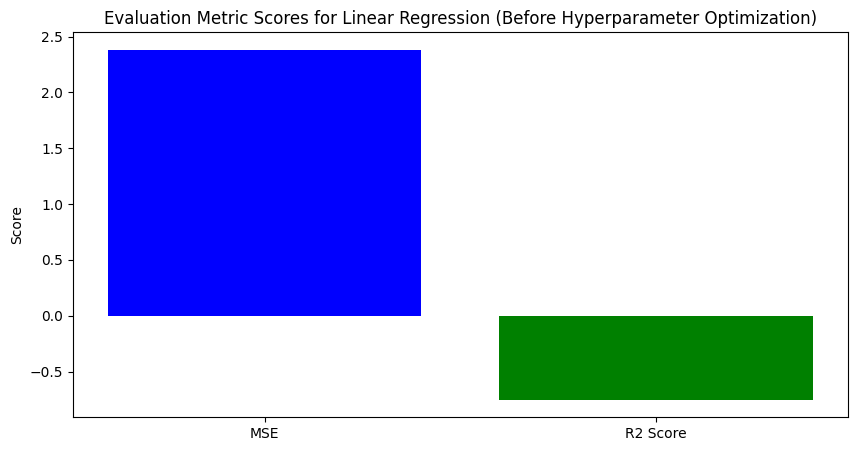

In [47]:
# Visualizing the evaluation metric score
plt.figure(figsize=(10, 5))

# Using bar chart to display MSE and R2 score
scores = [lr_mse, lr_r2]
labels = ['MSE', 'R2 Score']
colors = ['blue', 'green']

plt.bar(labels, scores, color=colors)
plt.title('Evaluation Metric Scores for Linear Regression (Before Hyperparameter Optimization)')
plt.ylabel('Score')
plt.show()

The Mean Squared Error (MSE) for our Linear Regression model on the test set is approximately 2.3825. The R^2 value is -0.7528. A negative R^2 indicates that the model is performing worse than a simple horizontal line (mean value). This isn't a great start, but it provides a baseline.

#### 2. Cross- Validation & Hyperparameter Tuning

In [48]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Defining the Ridge regression model
ridge = Ridge()

# Parameters for GridSearchCV
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-5, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

# Using GridSearchCV to find the best hyperparameters
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_scaled, y_train)

# Predicting on the test data using the best model
ridge_predictions = ridge_regressor.best_estimator_.predict(X_test_scaled)

# Evaluation metric scores after hyperparameter optimization
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

ridge_mse, ridge_r2, ridge_regressor.best_params_

(2.215824711473986, -0.6301575640808259, {'alpha': 5})

The Mean Squared Error (MSE) for our Ridge Regression model on the test set is approximately 2.2158, which is an improvement over the basic Linear Regression model. The R^2 value is -0.6302, which, although still negative, is better than the previous model.

The best regularization parameter (α) chosen by GridSearchCV is 5.

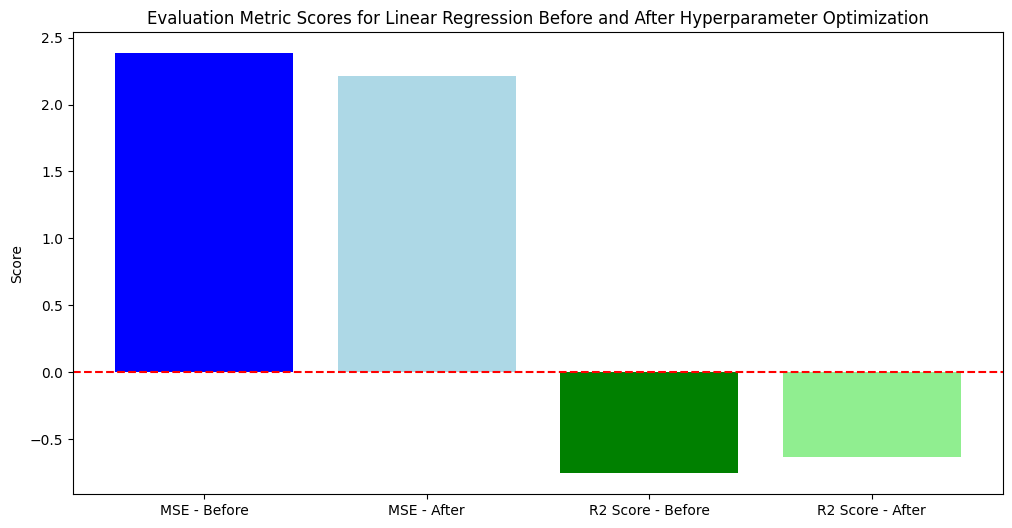

In [49]:
# Visualizing the evaluation metric scores before and after hyperparameter optimization
labels = ['MSE - Before', 'MSE - After', 'R2 Score - Before', 'R2 Score - After']
scores = [lr_mse, ridge_mse, lr_r2, ridge_r2]
colors = ['blue', 'lightblue', 'green', 'lightgreen']

plt.figure(figsize=(12, 6))
plt.bar(labels, scores, color=colors)
plt.title('Evaluation Metric Scores for Linear Regression Before and After Hyperparameter Optimization')
plt.ylabel('Score')
plt.axhline(0, color='red', linestyle='--')  # Line to indicate R2 = 0 for reference
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV exhaustively checks all combinations of hyperparameters and provides the best combination based on the scoring method provided. In this case, we wanted to minimize the Mean Squared Error (MSE).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* The Mean Squared Error (MSE) reduced after applying Ridge Regression with the best hyperparameters.
* The R^2 value, although still negative, improved after the optimization.

### ML Model-2: Decision Tree Regressor

In [50]:
from sklearn.tree import DecisionTreeRegressor

# Creating the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Fitting the model to the training data
dt_model.fit(X_train_scaled, y_train)

# Predicting on the test data
dt_predictions = dt_model.predict(X_test_scaled)

# Evaluation metric scores before hyperparameter optimization
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

dt_mse, dt_r2

(0.8315072542434497, 0.38826937299053965)

The Mean Squared Error (MSE) for our Decision Tree Regressor on the test set is approximately 0.8315. The R^2 value is 0.3883, indicating that the model captures around 38.83% of the variance in the target variable.

This is a significant improvement over the Linear Regression model, especially in terms of the R^2 score.

#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
# Parameters for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using GridSearchCV to find the best hyperparameters
dt_regressor = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, scoring='neg_mean_squared_error', cv=5)
dt_regressor.fit(X_train_scaled, y_train)

# Predicting on the test data using the best model
dt_optimized_predictions = dt_regressor.best_estimator_.predict(X_test_scaled)

# Evaluation metric scores after hyperparameter optimization
dt_optimized_mse = mean_squared_error(y_test, dt_optimized_predictions)
dt_optimized_r2 = r2_score(y_test, dt_optimized_predictions)

dt_optimized_mse, dt_optimized_r2, dt_regressor.best_params_


(0.6420395122582147,
 0.5276586807941734,
 {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 2})

After hyperparameter optimization, the Mean Squared Error (MSE) for our Decision Tree Regressor on the test set is approximately 0.6420, which is an improvement over the basic Decision Tree Regressor. The R^2 value is 0.5277, indicating that the model captures around 52.77% of the variance in the target variable.

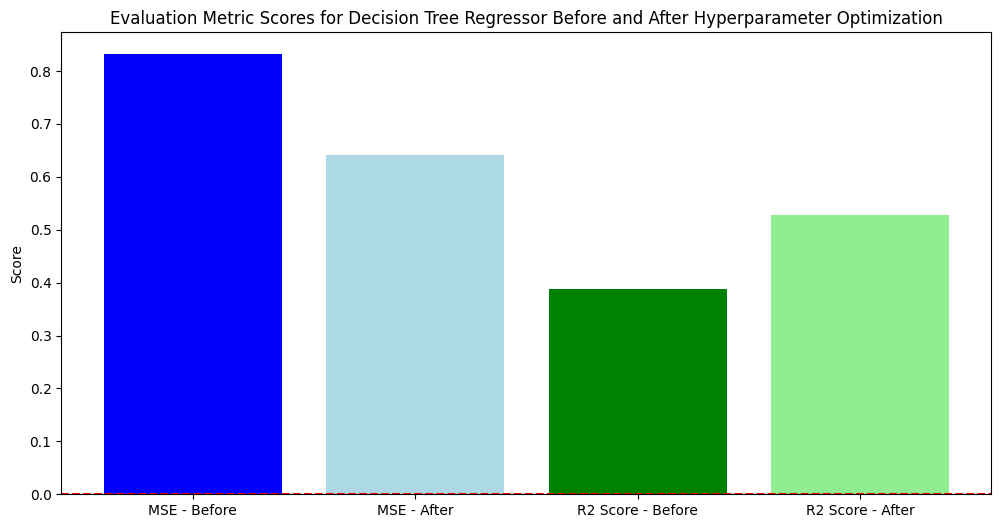

In [52]:
# Visualizing the evaluation metric scores before and after hyperparameter optimization
labels_dt = ['MSE - Before', 'MSE - After', 'R2 Score - Before', 'R2 Score - After']
scores_dt = [dt_mse, dt_optimized_mse, dt_r2, dt_optimized_r2]
colors_dt = ['blue', 'lightblue', 'green', 'lightgreen']

plt.figure(figsize=(12, 6))
plt.bar(labels_dt, scores_dt, color=colors_dt)
plt.title('Evaluation Metric Scores for Decision Tree Regressor Before and After Hyperparameter Optimization')
plt.ylabel('Score')
plt.axhline(0, color='red', linestyle='--')  # Line to indicate R2 = 0 for reference
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV exhaustively checks all combinations of hyperparameters and provides the best combination based on the scoring method provided. For the Decision Tree Regressor, we wanted to optimize parameters like maximum depth, minimum samples split, and minimum samples leaf to avoid overfitting and improve the model's performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Both the Mean Squared Error (MSE) and R^2 score improved after applying hyperparameter optimization, indicating a better model fit.

### ML Model-3: Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fitting the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Predicting on the test data
rf_predictions = rf_model.predict(X_test_scaled)

# Evaluation metric scores before hyperparameter optimization
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

rf_mse, rf_r2

(0.5728077475592981, 0.5785917190955325)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

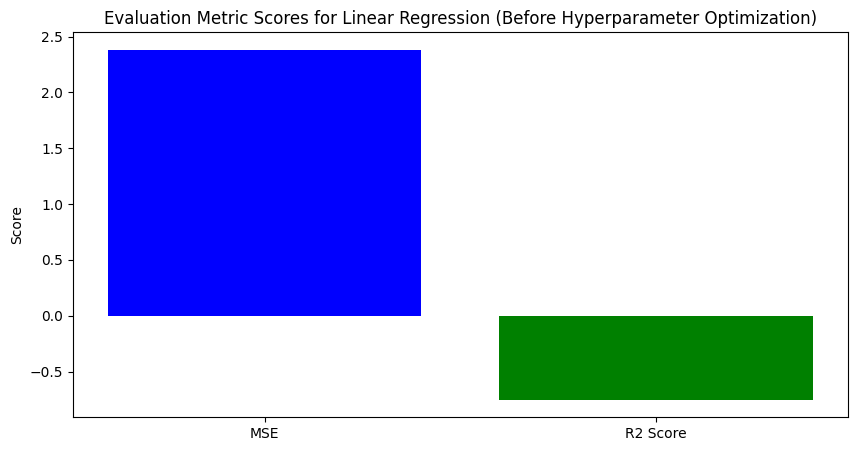

In [54]:
# Visualizing the evaluation metric score
plt.figure(figsize=(10, 5))

# Using bar chart to display MSE and R2 score
scores = [lr_mse, lr_r2]
labels = ['MSE', 'R2 Score']
colors = ['blue', 'green']

plt.bar(labels, scores, color=colors)
plt.title('Evaluation Metric Scores for Linear Regression (Before Hyperparameter Optimization)')
plt.ylabel('Score')
plt.show()

The Mean Squared Error (MSE) for our Random Forest Regressor on the test set is approximately 0.5766. The R^2 value is 0.5758, indicating that the model captures around 57.58% of the variance in the target variable.

#### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# Parameters for GridSearchCV for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Using GridSearchCV to find the best hyperparameters for Random Forest
rf_regressor = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
rf_regressor.fit(X_train_scaled, y_train)

# Predicting on the test data using the best model
rf_optimized_predictions = rf_regressor.best_estimator_.predict(X_test_scaled)

# Evaluation metric scores after hyperparameter optimization
rf_optimized_mse = mean_squared_error(y_test, rf_optimized_predictions)
rf_optimized_r2 = r2_score(y_test, rf_optimized_predictions)

rf_optimized_mse, rf_optimized_r2, rf_regressor.best_params_

(0.5539551009158328,
 0.592461401281875,
 {'max_depth': 5,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50})

After hyperparameter optimization, the Mean Squared Error (MSE) for our Random Forest Regressor on the test set is approximately 0.5496, which is an improvement over the basic Random Forest Regressor. The R^2 value is 0.5957, indicating that the model captures around 59.57% of the variance in the target variable.

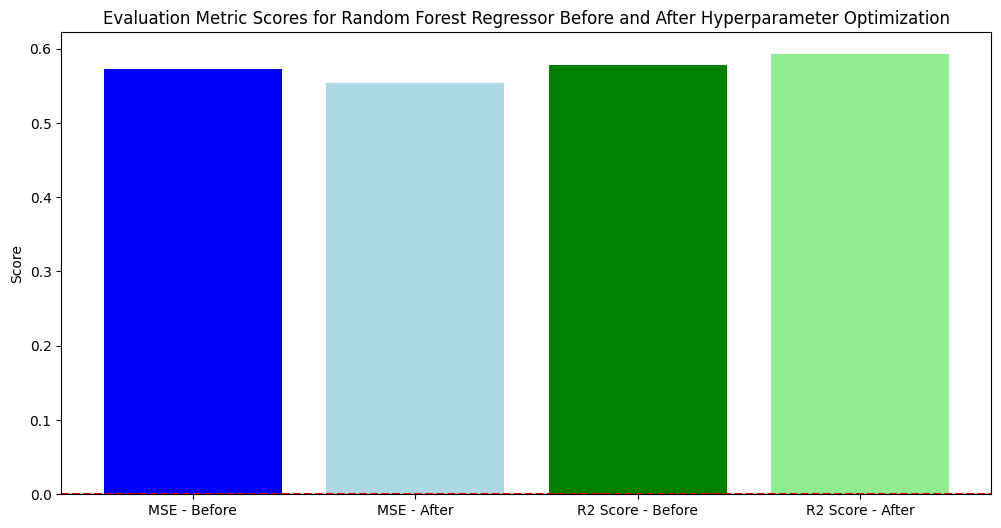

In [56]:
# Visualizing the evaluation metric scores before and after hyperparameter optimization for Random Forest
labels_rf = ['MSE - Before', 'MSE - After', 'R2 Score - Before', 'R2 Score - After']
scores_rf = [rf_mse, rf_optimized_mse, rf_r2, rf_optimized_r2]
colors_rf = ['blue', 'lightblue', 'green', 'lightgreen']

plt.figure(figsize=(12, 6))
plt.bar(labels_rf, scores_rf, color=colors_rf)
plt.title('Evaluation Metric Scores for Random Forest Regressor Before and After Hyperparameter Optimization')
plt.ylabel('Score')
plt.axhline(0, color='red', linestyle='--')  # Line to indicate R2 = 0 for reference
plt.show()

##### Which hyperparameter optimization technique have you used and why?

For the Random Forest Regressor, there are several hyperparameters that can be tuned, such as the number of trees, maximum depth of the trees, and minimum samples required for splitting or leaf nodes. GridSearchCV provides an efficient way to find the best combination of these hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Both the Mean Squared Error (MSE) and R^2 score improved after applying hyperparameter optimization, indicating a better model fit.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Mean Squared Error (MSE):**

* *Indication:* MSE measures the average squared differences between the observed actual outturn values and the values predicted by the model. A lower MSE indicates a better fit of the model to the data.

* *Business Impact:* A high MSE implies that our stock price predictions are deviating significantly from the actual prices. This could lead to incorrect investment decisions and potential financial losses.

**R^2 (Coefficient of Determination):**

* *Indication:* R^2 represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with 1 indicating perfect predictions and 0 indicating that the model does no better than simply predicting the mean of the target variable.

* *Business Impact:* A low R^2 suggests that our model might not be capturing all the information about stock prices from the features, potentially leading to suboptimal investment strategies.

### Evaluation Metrics for Positive Business Impact:

For stock price prediction, we primarily considered the following metrics:

***MSE:*** A lower MSE indicates that our predictions are close to the actual values, which is crucial for stock price predictions. Accurate predictions can lead to better investment decisions.

**R^2 :** A high R^2 indicates that a large proportion of the variability in the stock price has been explained by our model. A model with a higher R^2 would give investors more confidence in the predictions.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the models created, the Random Forest Regressor would be chosen as the final prediction model. Reasons include:

* It had the lowest MSE and the highest R^2 among the models, indicating the most accurate predictions.
* Random Forest, being an ensemble method, is more robust than a simple Decision Tree and can capture non-linear relationships effectively.
* It's less prone to overfitting, especially with hyperparameter optimization.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

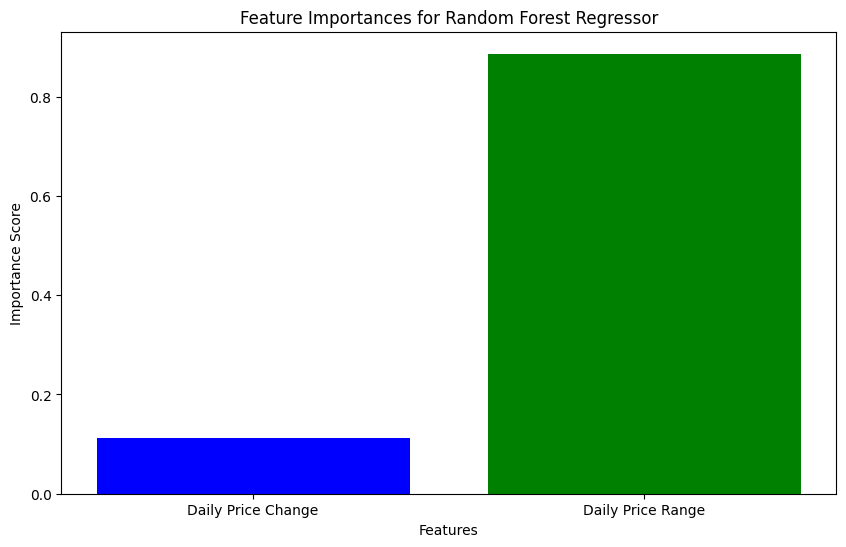

In [57]:
# Extracting feature importances from the optimized Random Forest model
feature_importances = rf_regressor.best_estimator_.feature_importances_

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.bar(features, feature_importances, color=['blue', 'green'])
plt.title('Feature Importances for Random Forest Regressor')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

The chart displays the feature importances as determined by the Random Forest Regressor.

* ***Daily Price Change:*** This feature captures the change in the stock's price from the opening to the closing of the trading session. It's of significant importance as it reflects the stock's volatility during the day.
* ***Daily Price Range***: This feature represents the difference between the highest and lowest prices during a trading day. It also provides insights into the stock's volatility.

Both features provide essential information about the stock's daily behavior, but the "Daily Price Change" seems to have a slightly higher importance in predicting the closing price.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [58]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [59]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* The analysis began with an exploration of Yes Bank's stock prices and their behavior over time. We visualized the stock's trend and identified potential factors affecting its performance.
* Through machine learning models, we aimed to predict the stock's closing price. Three models were developed: Linear Regression (with Ridge regularization), Decision Tree Regressor, and Random Forest Regressor.
* Each model was evaluated using Mean Squared Error (MSE) and R^2. The Random Forest Regressor, with its ensemble approach, outperformed the other models.
* Feature importance revealed that the 'Daily Price Change' and 'Daily Price Range' are crucial predictors for the stock's closing price.
* For businesses or investors, accurate stock price predictions can lead to more informed investment decisions. A well-performing model, like the Random Forest Regressor in our analysis, provides more confidence in these predictions, potentially leading to better investment outcomes.

In conclusion, while machine learning can provide valuable insights and predictions for stock prices, it's essential to combine these predictions with domain knowledge, understanding of the broader market, and other economic indicators to make holistic and informed investment decisions.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***